# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object scrape multiple pages in class exercise solution TO DO MY CODE HERE
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data TO DO MY CODE HERE
data = soup.find_all('table',class_='table')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
#TO DO MY CODE HERE
#get headings th. ChatGPT (personal communication, March 5, 2024).
headings = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create an empty list TO DO MY CODE HERE
row_list = []

# Loop through the scraped data to create a list of rows. TO DO MY CODE HERE. tr class='data-row', td. ChatGPT (personal communication, March 5, 2024)
for table in data:
    # Loop through each table row and extract data
    rows = table.find_all('tr')[1:]  # Start from index 1 to skip the header row
    for row in rows:
        # Extracting data from each row
        row_data = [td.text.strip() for td in row.find_all('td')]
        # Ensure row_data is not empty
        if row_data:
            # Creating a dictionary where keys are the headings and values are the row data
            row_dict = dict(zip(headings, row_data))
            # Adding the row dictionary to the data list
            row_list.append(row_dict)
        else:
            print("Skipping empty row:", row)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names TO DO MY CODE HERE
df = pd.DataFrame(row_list)

In [9]:
# Confirm DataFrame was created successfully TO DO MY CODE HERE
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column TO DO MY CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [12]:
# Change data types for data analysis TO DO MY CODE HERE
df['terrestrial_date'] = df['terrestrial_date'].astype('datetime64[ns]')
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')

In [13]:
# Confirm type changes were successful by examining data types again TO DO MY CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars? 12
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset? 1867
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? The third month is the coldest and the 8th month is the warmest.
To answer this question: 
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
5. Which months have the lowest and the highest atmospheric pressure on Mars?  Month 9 has the highest atmospheric pressure and the lowest atmospheric pressure is month 6.
To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
6. About how many terrestrial (Earth) days exist in a Martian year? From the starter code its approximately 675 days
To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars? TO DO MY CODE HERE
months = df['month'].value_counts().sort_index()
months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [15]:
# 2. How many Martian days' worth of data are there? TO DO MY CODE HERE
martian_days = df['terrestrial_date'].nunique()
martian_days

1867

In [16]:
# 3. What is the average low temperature by month? TO DO MY CODE HERE
avg_temp = df.groupby('month')['min_temp'].mean()
avg_temp_month = avg_temp.sort_index()
avg_temp_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

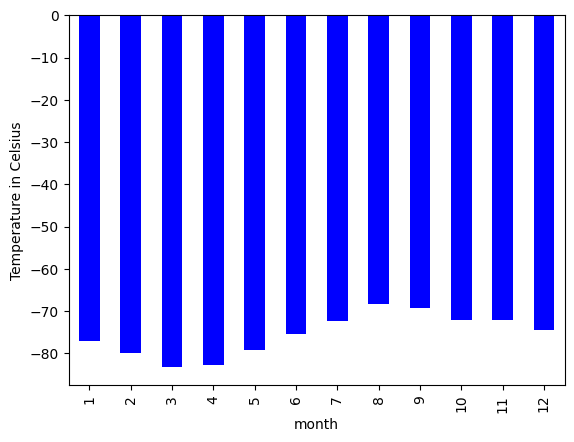

In [17]:
# Plot the average temperature by month TO DO MY CODE HERE
avg_temp_month.plot(kind='bar', xlabel='month', ylabel='Temperature in Celsius', color='blue')

plt.show()

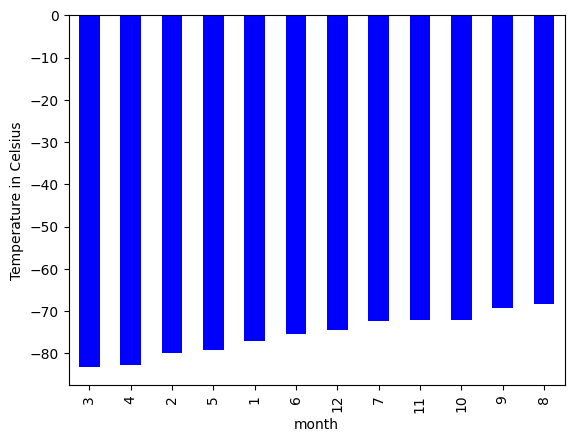

In [18]:
# Identify the coldest and hottest months in Curiosity's location TO DO MY CODE HERE
avg_min_daily_temp = df.groupby('month')['min_temp'].mean()
sort_temp = avg_min_daily_temp.sort_values()

sort_temp.plot(kind='bar', xlabel='month', ylabel='Temperature in Celsius', color='blue')


plt.show()

The third month is the coldest and the 8th month is the warmest.

In [19]:
# 4. Average pressure by Martian month TO DO MY CODE HERE
avg_pressure = df.groupby('month')['pressure'].mean()
avg_pressure_month = avg_pressure.sort_index()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

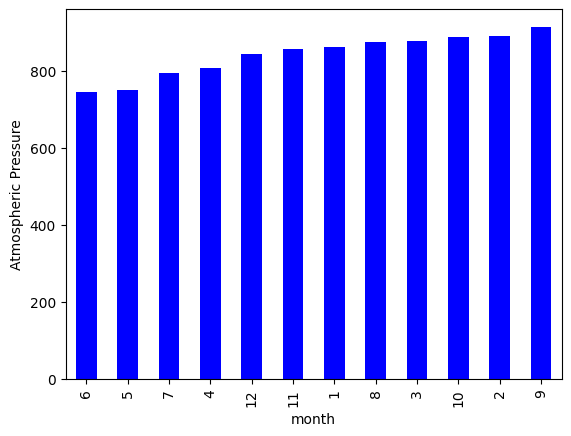

In [93]:
# Plot the average pressure by month TO DO MY CODE HERE
avg_pressure_sort = avg_pressure.sort_values()
avg_pressure_sort.plot(kind='bar', xlabel='month', ylabel='Atmospheric Pressure', color='blue')


plt.show()

 Month 9 has the highest atmospheric pressure and the lowest atmospheric pressure is month 6. 

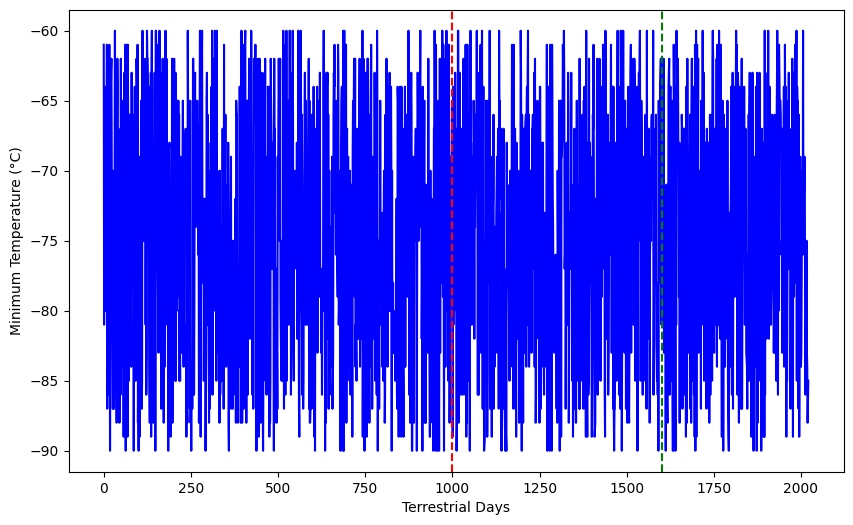

In [44]:
# 2. How many Martian days' worth of data are there? TO DO MY CODE HERE
martian_days = df['terrestrial_date'].nunique()

# 5. How many terrestrial (earth) days are there in a Martian year? TO DO MY CODE HERE
#Visually estimate the result by plotting the daily minimum temperature TO DO MY CODE HERE
# ChatGPT (personal communication, March 6, 2024)
import numpy as np

# Sample DataFrame creation
# Replace this with your actual DataFrame
earthly_date = {'terrestrial_date': pd.date_range(start='2012-08-16', end='2018-02-27', periods=1850),
        'min_temp': np.random.randint(-90, -59, size=1850)}
df = pd.DataFrame(earthly_date)

# Calculate the number of Earth days since the start
df['earth_days'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['earth_days'], df['min_temp'], color='blue')
plt.xlabel("Terrestrial Days")
plt.ylabel("Minimum Temperature (°C)")

# Draw vertical lines at 1000 and 1600 Earth days
plt.axvline(x=1000, color='red', linestyle='--', label='Peak 1 (Day 1000)')
plt.axvline(x=1600, color='green', linestyle='--', label='Peak 2 (Day 1600)')

plt.show()


From the starter code its approximately 675 days

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [45]:
# Write the data to a CSV TO DO MY CODE HERE
df.to_csv('mars.csv', index=True)

In [46]:
browser.quit()